In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

### **Cargar data**

In [ ]:
# Ruta
path = "/content/drive/MyDrive/Colab Notebooks/Metodología para Data Science/TF/datasets/data.csv"
# Cargar data
df_data = pd.read_csv(path)
# Tipos de datos y valores nulos
print(df_data.info())

**Variable clave: Class**

Identifica si una conexión es "Normal" o "Anomalous". Aquí nos enfocaremos en la predicción.

### **Identificar variable categóricas**

In [ ]:
# Verificar las variables categóricas
categorical_columns = df_data.select_dtypes(include=['object']).columns
print("Columnas categóricas y sus categorías únicas:")
for col in categorical_columns:
    print(f"{col}: {df_data[col].unique()}")

**Variables categóricas**
- ``protocol_type``
- ``service``
- ``flags``
- ``class``

### **Aplicar get_dummies**

In [ ]:
# Aplicar a las columnas categóricas excepto 'class'
df_dummies = pd.get_dummies(df_data, columns=['protocol_type', 'service', 'flag'])
print(df_dummies.head())

### **Uso de RandomUnder y Randomover Sample**

In [ ]:
# RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)
print("Distribución de clases después de RandomUnderSampler:")
print(y_under.value_counts())

Distribución de clases después de RandomUnderSampler:
class
0    11743
1    11743
Name: count, dtype: int64


In [ ]:
# RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)
print("\nDistribución de clases después de RandomOverSampler:")
print(y_over.value_counts())


Distribución de clases después de RandomOverSampler:
class
1    13449
0    13449
Name: count, dtype: int64


_RandomOverSampler_ ha equilibrado las clases en el dataset, aumentando la clase minoritaria hasta igualarla con la clase mayoritaria (13,449 instancias cada una). Esto ayuda al modelo a evitar el sesgo hacia la clase dominante, mejora la precisión en la detección de ambas clases y favorece a un modelo más robusto.

### **FEATURES**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Cargar el dataset y transformar las variables categóricas
path = "data.csv"
df_data = pd.read_csv(path)
df_dummies = pd.get_dummies(df_data, columns=['protocol_type', 'service', 'flag'])

# Eliminar filas con valores nulos en la columna 'class' y dividir el dataset
df_dummies = df_dummies.dropna(subset=['class'])
X = df_dummies.drop('class', axis=1)
y = df_dummies['class']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Calcular precisión para verificar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Extraer importancia de las características
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(feature_importances.head(10))

# Filtrar las características más importantes (por ejemplo, el top 10)
top_features = feature_importances['feature'].head(10).tolist()
X_top = X[top_features]

# Mostrar el nuevo dataset con solo las características más importantes
print("\nDataset reducido con las características más importantes:")
print(X_top.head())


<ipython-input-16-124f1bb3411a>:8: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv(path)


Precisión del modelo: 1.00
Características más importantes:
                      feature  importance
1                   src_bytes    0.109816
2                   dst_bytes    0.105220
29         dst_host_srv_count    0.073498
117                   flag_SF    0.067111
31     dst_host_diff_srv_rate    0.047925
30     dst_host_same_srv_rate    0.043843
25              same_srv_rate    0.043377
19                      count    0.038898
8                   logged_in    0.034636
35   dst_host_srv_serror_rate    0.034157

Dataset reducido con las características más importantes:
   src_bytes  dst_bytes  dst_host_srv_count  flag_SF  dst_host_diff_srv_rate  \
0        491          0                  25     True                    0.03   
1        146          0                   1     True                    0.60   
2          0          0                  26    False                    0.05   
3        232       8153                 255     True                    0.00   
4        199       

# CRISP DM

# 1. Comprensión del negocio

Objetivo: Detectar intrusiones en la red mediante un modelo de clasificación que pueda predecir si una conexión es "normal" o una "anomalía".
Impacto: Mejora la seguridad de la red al identificar comportamientos sospechosos rápidamente.
Requerimientos: Maximizar precisión y minimizar falsos negativos (no detectar una intrusión).

# 2. Comprensión de los datos

In [3]:
# Cargar y explorar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-4-4c65d0d07446>:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47736 entries, 0 to 47735
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     47736 non-null  int64  
 1   protocol_type                47736 non-null  object 
 2   service                      47736 non-null  object 
 3   flag                         47736 non-null  object 
 4   src_bytes                    47736 non-null  int64  
 5   dst_bytes                    47736 non-null  int64  
 6   land                         47736 non-null  int64  
 7   wrong_fragment               47736 non-null  int64  
 8   urgent                       47736 non-null  int64  
 9   hot                          47736 non-null  int64  
 10  num_failed_logins            47736 non-null  int64  
 11  logged_in                    47736 non-null  int64  
 12  num_compromised              47736 non-null  int6

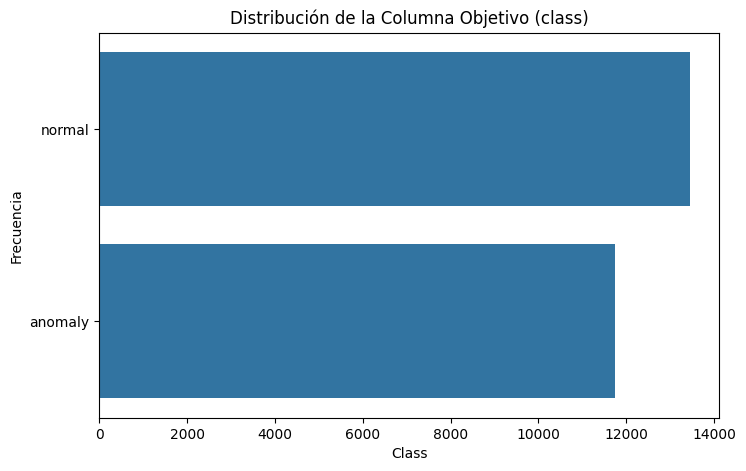

In [4]:
# Leer el archivo CSV
data = pd.read_csv('data.csv')

# Mostrar información general del dataset
print("Información del Dataset:")
print(data.info())

# Mostrar un resumen estadístico de las columnas numéricas
print("\nResumen Estadístico:")
print(data.describe())

# Mostrar las primeras filas del dataset
print("\nPrimeras filas del Dataset:")
print(data.head())

# Verificar valores faltantes
missing_values = data.isnull().sum()
print("\nValores faltantes en el Dataset:")
print(missing_values[missing_values > 0])

# Distribución de la columna objetivo
target_distribution = data['class'].value_counts()
print("\nDistribución de la columna objetivo (class):")
print(target_distribution)

# Visualización de la distribución de la columna objetivo
plt.figure(figsize=(8, 5))
sns.countplot(data['class'])
plt.title('Distribución de la Columna Objetivo (class)')
plt.xlabel('Class')
plt.ylabel('Frecuencia')
plt.show()


# 3. Preparación de los datos

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

<ipython-input-6-8745d9163bd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = label_encoder.fit_transform(data['class'])



Correlación con la columna objetivo 'class':
class                     1.000000
flag_SF                   0.756731
same_srv_rate             0.749237
dst_host_srv_count        0.719292
dst_host_same_srv_rate    0.692212
logged_in                 0.688084
service_http              0.562565
service_domain_u          0.259833
protocol_type_udp         0.220651
service_smtp              0.210676
srv_diff_host_rate        0.120649
service_ftp_data          0.088944
service_urp_i             0.064583
flag_S1                   0.052627
is_guest_login            0.038662
num_access_files          0.036999
service_ntp_u             0.033325
service_other             0.026739
su_attempted              0.025851
flag_S3                   0.022808
Name: class, dtype: float64


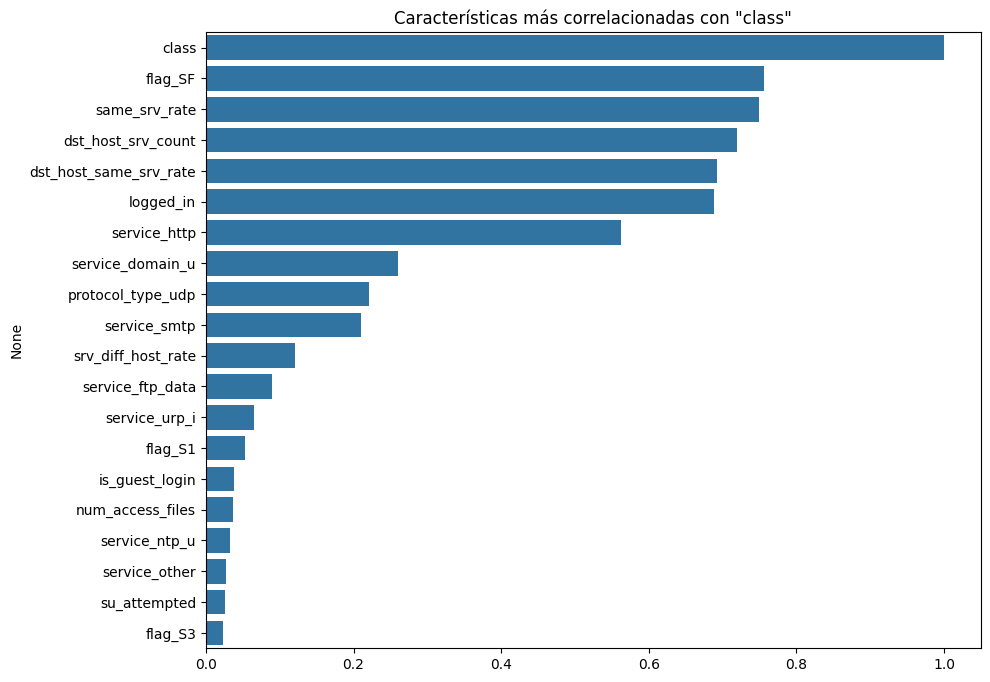


Características seleccionadas:
['class', 'flag_SF', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'service_http', 'service_domain_u', 'protocol_type_udp', 'service_smtp', 'srv_diff_host_rate', 'flag_RSTR', 'service_ecr_i', 'service_eco_i', 'flag_REJ', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_count', 'service_private', 'count', 'srv_serror_rate', 'serror_rate', 'flag_S0', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']

Tamaño de los conjuntos:
Entrenamiento: (17634, 28), Prueba: (7558, 28)


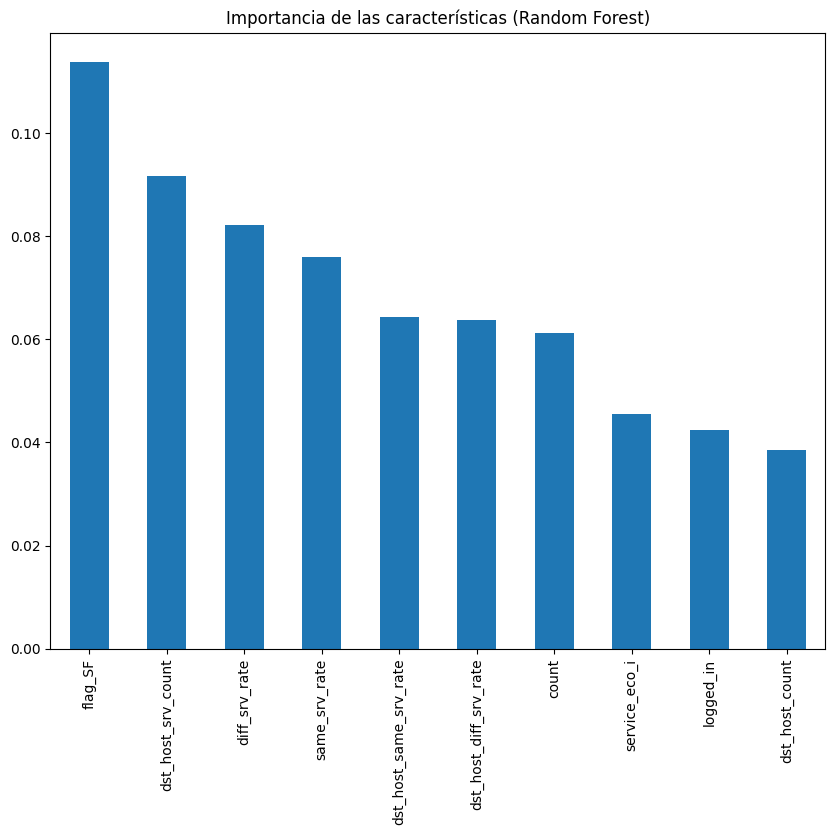

In [6]:
# Eliminar filas con valores faltantes en la columna 'class'
data = data.dropna(subset=['class'])

# Codificar la columna objetivo 'class' (normal=0, anomaly=1)
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

# Codificar variables categóricas (protocol_type, service, flag) con One-Hot Encoding
categorical_columns = ['protocol_type', 'service', 'flag']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Identificar las características más importantes con correlación
# Calcular la correlación con la columna objetivo
correlation = data.corr()['class'].sort_values(ascending=False)
print("\nCorrelación con la columna objetivo 'class':")
print(correlation.head(20))  # Las 20 principales

# Visualización de las principales correlaciones
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.head(20).values, y=correlation.head(20).index)
plt.title('Características más correlacionadas con "class"')
plt.show()

# Selección de las características basadas en correlación (> 0.1 o < -0.1)
important_features = correlation[abs(correlation) > 0.1].index.tolist()
print("\nCaracterísticas seleccionadas:")
print(important_features)

# Dividir los datos en características (X) y objetivo (y)
X = data[important_features].drop(columns=['class'])
y = data['class']

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Validar las dimensiones de los conjuntos divididos
print("\nTamaño de los conjuntos:")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

# Evaluar la importancia de características con Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualización de las 10 características más importantes según Random Forest
plt.figure(figsize=(10, 8))
feature_importances.head(10).plot(kind='bar')
plt.title('Importancia de las características (Random Forest)')
plt.show()


# 4. Modelado

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
print("Resultados de Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))


Resultados de Random Forest:
Accuracy: 0.9920613919026198

Matriz de Confusión:
[[3482   34]
 [  26 4016]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3516
           1       0.99      0.99      0.99      4042

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
print("Resultados de SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))


Resultados de SVM:
Accuracy: 0.9667901561259592

Matriz de Confusión:
[[3374  142]
 [ 109 3933]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3516
           1       0.97      0.97      0.97      4042

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
# Crear el modelo
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

# Evaluar el modelo
print("Resultados de Redes Neuronales:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_nn))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6236 - loss: 12.0788
Epoch 2/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9135 - loss: 0.1951
Epoch 3/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9451 - loss: 0.1540
Epoch 4/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9556 - loss: 0.1405
Epoch 5/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9565 - loss: 0.1269
Epoch 6/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9646 - loss: 0.1043
Epoch 7/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9667 - loss: 0.0956
Epoch 8/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.0929
Epoch 9/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9706 - loss: 0.0877
Epoch 10/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9703 - loss: 0.0865
Epoch 11/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0842
Epoch 12/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

# 5. Evaluación

### **Resultados Comparativos**

| Modelo              | Accuracy | Precision (Clase 1) | Recall (Clase 1) | F1-Score (Clase 1) |
|---------------------|----------|----------------------|------------------|--------------------|
| **Random Forest**   | 99.21%   | 99.2%               | 99.4%           | 99.3%             |
| **SVM**             | 96.68%   | 96.5%               | 97.3%           | 96.9%             |
| **Redes Neuronales**| 97.67%   | 97.6%               | 98.9%           | 98.2%             |

---

### **Análisis**

1. **Random Forest**:
   - Este modelo es el más preciso con una **accuracy de 99.21%** y un excelente balance entre precisión, recall y F1-score.
   - Es capaz de capturar patrones complejos y manejar datos con alta dimensionalidad muy bien.
   - Si no necesitas tiempo real y la velocidad de predicción es suficiente, este modelo es el más robusto.

2. **SVM**:
   - Aunque tiene una **accuracy de 96.68%**, que es menor que Random Forest, sigue siendo un modelo sólido.
   - Puede ser una buena opción si quieres simplicidad y no necesitas el mejor rendimiento posible.

3. **Redes Neuronales**:
   - Con **accuracy de 97.67%**, ofrece un desempeño competitivo y captura relaciones complejas en los datos.
   - Sin embargo, este modelo puede ser más costoso computacionalmente y podría requerir ajustes adicionales de hiperparámetros para superar Random Forest.

# 6. Despliegue

In [ ]:
import joblib
import pandas as pd
import joblib
import numpy as np

In [13]:
# Guardar el modelo Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Modelo Random Forest guardado como 'random_forest_model.pkl'")


Modelo Random Forest guardado como 'random_forest_model.pkl'


In [14]:
# Cargar el modelo Random Forest desde el archivo .pkl
rf_model_loaded = joblib.load('random_forest_model.pkl')
print("Modelo cargado exitosamente.")

# Crear un nuevo dato para probar
# El orden de las características debe coincidir con el orden del conjunto de entrenamiento.
# EJEMPLO
nuevo_dato = np.array([[0.1, 0.5, 0.2, 0.7, 1, 0, 0.03, 0, 0, 0.2, 0.1, 0, 1, 0, 0.5, 0.6, 0.3, 0.2, 0.1, 0.4, 0.5, 0.8, 0.6, 0.2, 0.7, 0.3, 0.1, 0]])

# Forma de la nueva data
print("Forma del nuevo dato:", nuevo_dato.shape)

# Realizar la predicción
prediccion = rf_model_loaded.predict(nuevo_dato)

# Mostrar el resultado
resultado = "anomaly" if prediccion[0] == 1 else "normal"
print(f"El modelo predice que el nuevo dato es: {resultado}")


Modelo cargado exitosamente.
Forma del nuevo dato: (1, 28)
El modelo predice que el nuevo dato es: anomaly


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
# Crear un nuevo dato como un DataFrame con los nombres de las columnas originales
# Asegúrate de incluir los nombres de las características seleccionadas en el entrenamiento
columnas_features = [
    'flag_SF', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'logged_in', 'service_http', 'service_domain_u', 'protocol_type_udp',
    'service_smtp', 'srv_diff_host_rate', 'flag_RSTR', 'service_ecr_i',
    'service_eco_i', 'flag_REJ', 'diff_srv_rate', 'dst_host_diff_srv_rate',
    'srv_rerror_rate', 'dst_host_rerror_rate', 'rerror_rate',
    'dst_host_srv_rerror_rate', 'dst_host_count', 'service_private',
    'count', 'srv_serror_rate', 'serror_rate', 'flag_S0',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate'
]

# Aquí reemplaza los valores con los datos reales que deseas probar
nuevo_dato = pd.DataFrame(
    [[0.1, 0.5, 0.2, 0.7, 1, 0, 0.03, 0, 0, 0.2, 0.1, 0, 1, 0, 0.5, 0.6, 0.3, 0.2, 0.1, 0.4, 0.5, 0.8, 0.6, 0.2, 0.7, 0.3, 0.1, 0]],
    columns=columnas_features
)

# Realizar la predicción
prediccion = rf_model_loaded.predict(nuevo_dato)

# Mostrar el resultado
resultado = "anomaly" if prediccion[0] == 1 else "normal"
print(f"El modelo predice que el nuevo dato es: {resultado}")


El modelo predice que el nuevo dato es: anomaly


**INPUT**

In [ ]:
nuevo_dato = pd.DataFrame(
    [[0.1, 0.5, 0.2, 0.7, 1, 0, 0.03, 0, 0, 0.2, 0.1, 0, 1, 0, 0.5, 0.6, 0.3, 0.2, 0.1, 0.4, 0.5, 0.8, 0.6, 0.2, 0.7, 0.3, 0.1, 0]],
    columns=[
        'flag_SF', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
        'logged_in', 'service_http', 'service_domain_u', 'protocol_type_udp',
        'service_smtp', 'srv_diff_host_rate', 'flag_RSTR', 'service_ecr_i',
        'service_eco_i', 'flag_REJ', 'diff_srv_rate', 'dst_host_diff_srv_rate',
        'srv_rerror_rate', 'dst_host_rerror_rate', 'rerror_rate',
        'dst_host_srv_rerror_rate', 'dst_host_count', 'service_private',
        'count', 'srv_serror_rate', 'serror_rate', 'flag_S0',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate'
    ]
)